In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew, boxcox
sns.set()
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel(r"/content/Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.shape

(181673, 14)

In [ ]:
#check the uniqaueness of the values all the features
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [ ]:
#id of all the values are unique so features of id need to drop
df.drop(columns=['id'], inplace=True)
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
# Check the count of NaN values in all features
df.isnull().sum()

item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
#most number of nan values in 'material_ref' columns
#verify NaN values in 'Material_Reference' before replacement
print(f"NaN values in 'Material_Reference' before replacement = {df['material_ref'].isnull().sum()}")

# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

#verify NaN values in 'Material_Reference' after replacement
print(f"NaN values in 'Material_Reference' after replacement = {df['material_ref'].isnull().sum()}")

NaN values in 'Material_Reference' before replacement = 77919
NaN values in 'Material_Reference' after replacement = 100645


In [ ]:
#verify NaN values in 'Material_Reference' after replacement in %
print(np.round(df['material_ref'].isnull().mean()*100, 5),"% of missing values")

55.39899 % of missing values


In [ ]:
# 'material ref' columns have more than 55% are null values so need to drop
df.drop(columns=['material_ref'], inplace=True)
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181672 non-null  float64
 1   quantity tons  181673 non-null  object 
 2   customer       181672 non-null  float64
 3   country        181645 non-null  float64
 4   status         181671 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181649 non-null  float64
 7   thickness      181672 non-null  float64
 8   width          181673 non-null  float64
 9   product_ref    181673 non-null  int64  
 10  delivery date  181672 non-null  float64
 11  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 16.6+ MB


In [ ]:
# convert the data type from object to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
#Convert object type date columns to date format
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [ ]:
df.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [ ]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [ ]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816680e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816650e+05
mean,5.875066e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918124e+03
std,2.349107e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.318020e+05
min,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01
25%,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [ ]:
# check null values for all features
df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [ ]:
# Handling null values using median and mode

# identifying the object and numerical columns
object_columns = ['item_date','delivery date','status']
numerical_columns = ['quantity tons','customer','country','application','thickness','selling_price']

In [ ]:
# median - middle value in dataset (asc/desc), mode - value that appears most frequently in dataset

# Fill missing values in object column with the mode
for col in object_columns :
  df[col].fillna(df[col].mode()[0], inplace = True)

# Fill missing values in numerical column with the median
for col in numerical_columns:
  df[col].fillna(df[col].median(), inplace = True)
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
df.nunique()

item_date           250
quantity tons    181669
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
product_ref          33
delivery date        26
selling_price      9789
dtype: int64

In [ ]:
for col in ['country', 'status', 'item type','application']:
    print(col,df[col].unique())
    print('--'*20)

country [ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
----------------------------------------
status ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
----------------------------------------
item type ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
----------------------------------------
application [10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
----------------------------------------


In [ ]:
for col in ['status', 'item type']:
    print(df[col].value_counts())
    print('--'*20)

Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64
----------------------------------------
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64
----------------------------------------


#** Skewness Handling - Feature Scaling (Log Transformation)**

In [ ]:
# find outliers - box plot & skewed data - hist plot and violin plot

def skewness_plot(df, *column):
  number_row = len(column)
  plot_no=0
  for col_name in column:
    if 'log' in col_name or 'sqrt' in col_name or 'boxcox' in col_name:
        title= "After Transfermation"
    else:
        title = "Before Transfermation"

    plt.figure(figsize=(18,18))

    plot_no+=1
    plt.subplot(number_row, 3, plot_no)
    sns.boxplot(x=col_name, data=df)
    plt.title('Boxplot - '+ title)

    plot_no+=1
    plt.subplot(number_row, 3, plot_no)
    sns.distplot(df[col_name])
    plt.title(f'Distplot - Skewness: {skew(df[col_name])}')

    plot_no+=1
    plt.subplot(number_row, 3, plot_no)
    sns.violinplot(x=col_name, data=df)
    plt.title('Violinplot - ' + title)

  plt.tight_layout()
  return plt.show()

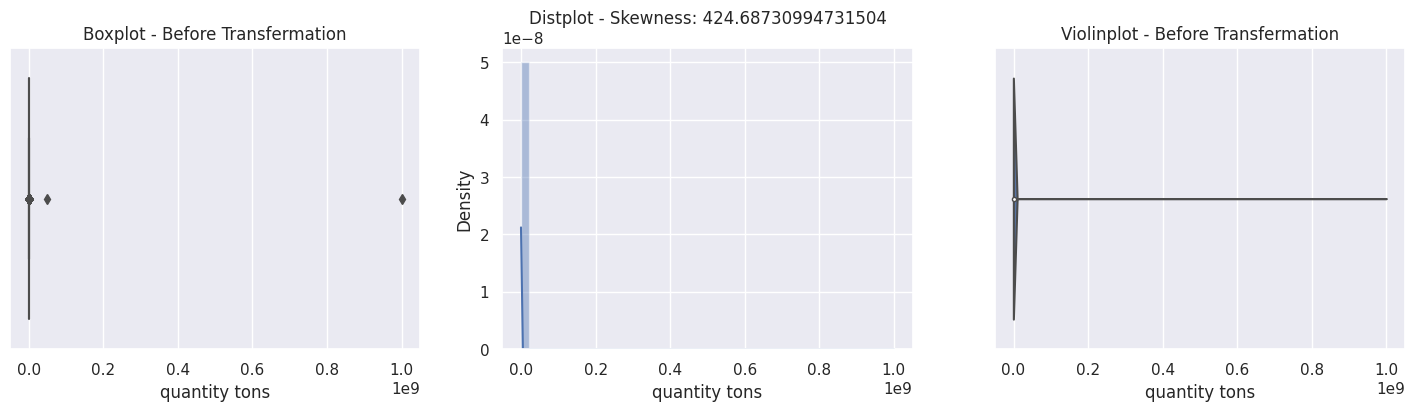

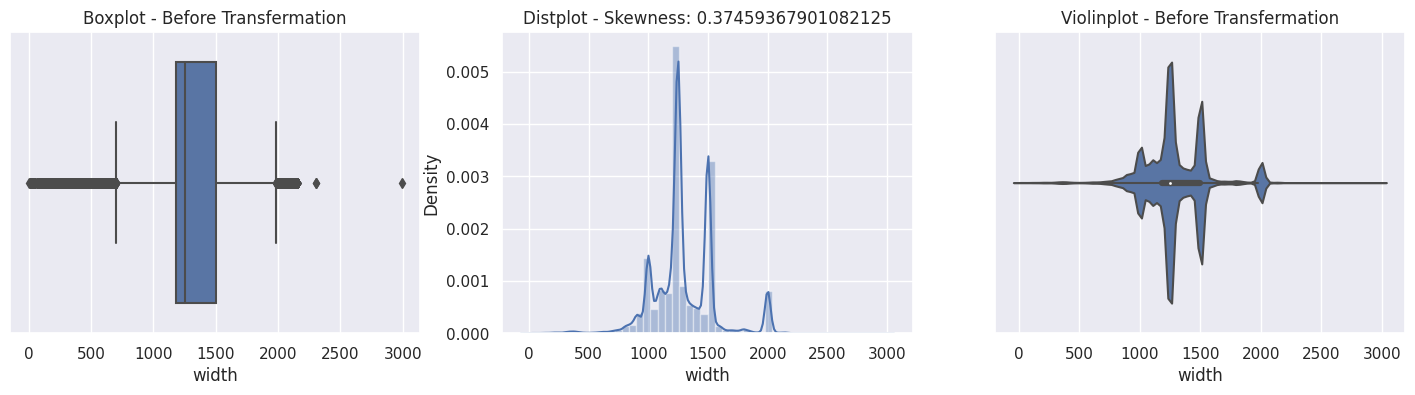

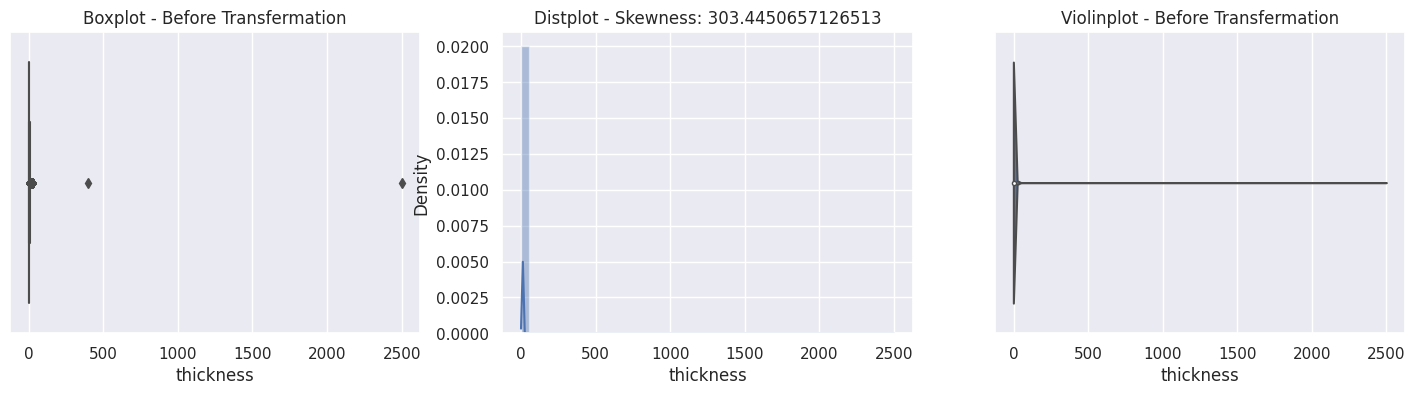

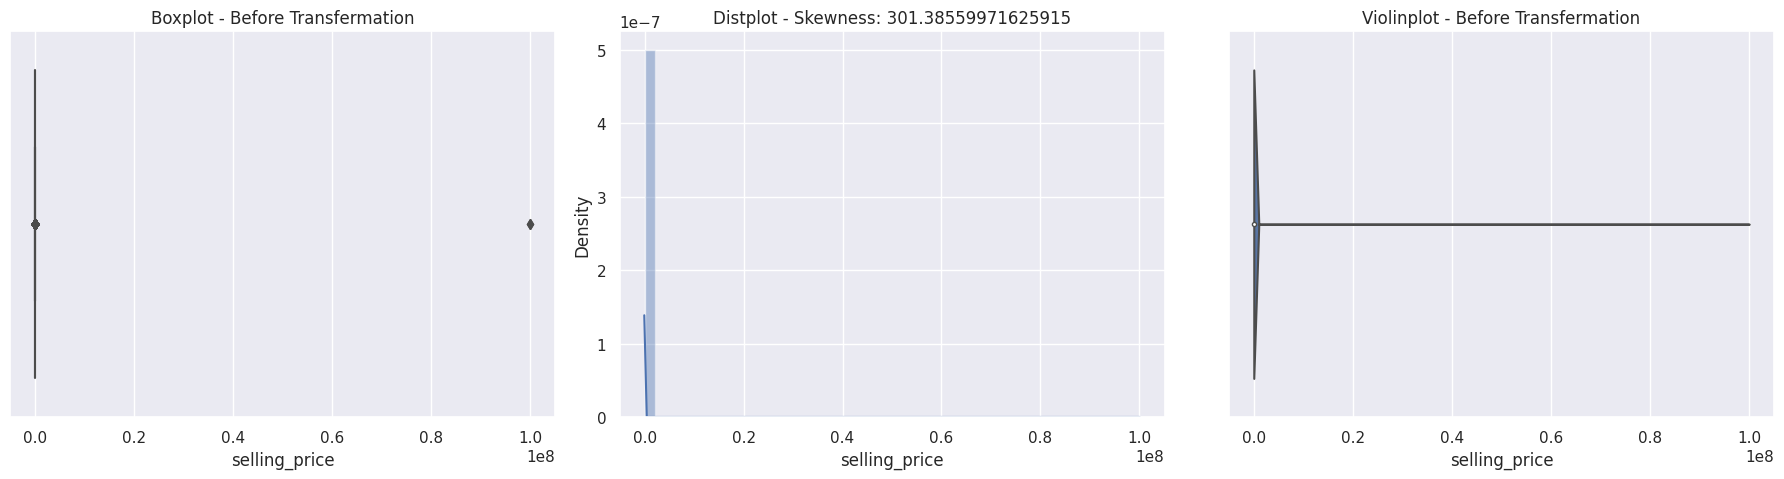

In [ ]:
# Specify numerical columns for analysis
numerical_columns = ['quantity tons', 'width','thickness','selling_price']
# Call the skewness_plot function
skewness_plot(df, *numerical_columns)

In [ ]:
df1 = df.copy()

In [ ]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

def Log_Transformation(df, *column):

    for col_name in column:
        # Log Tansformation
        df[col_name+'_log'] = np.log1p(df[col_name])

    column =[i for i in df.columns if 'log' in i]

    return skewness_plot(df, * column)

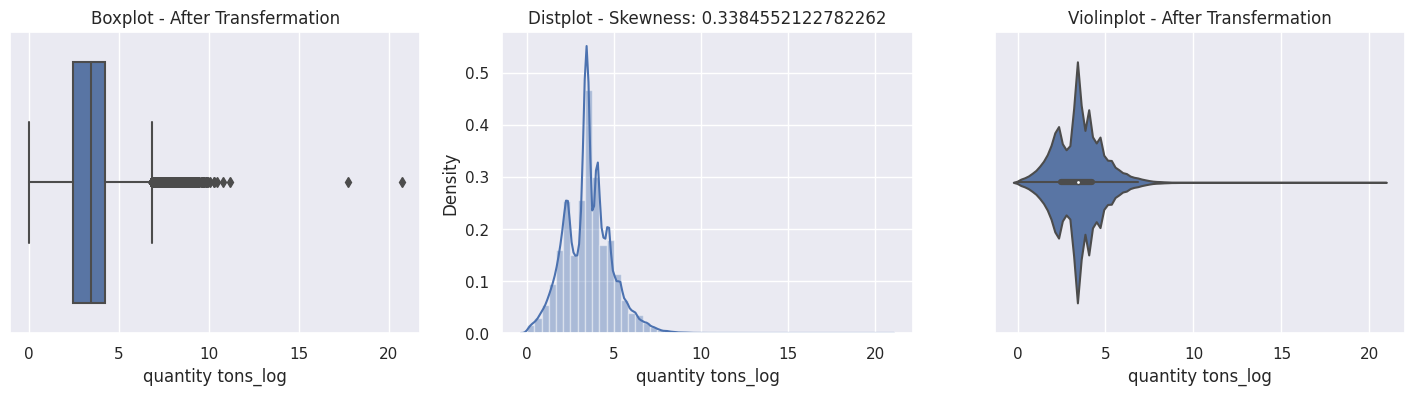

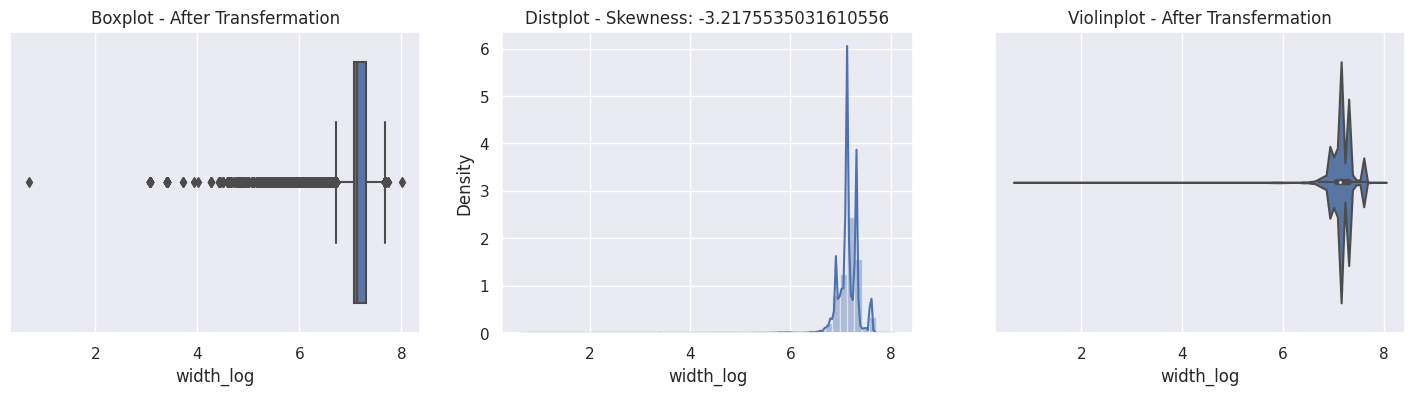

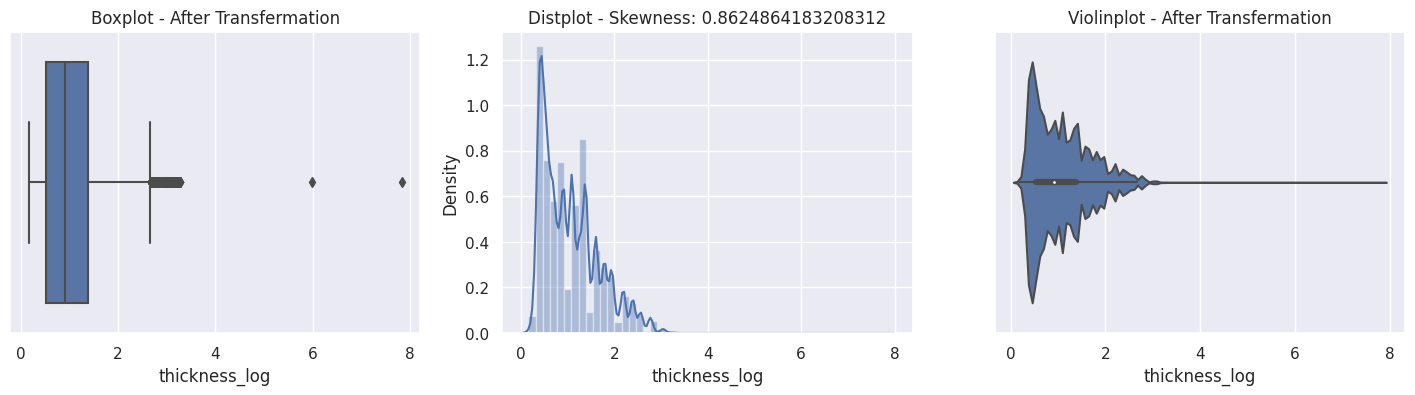

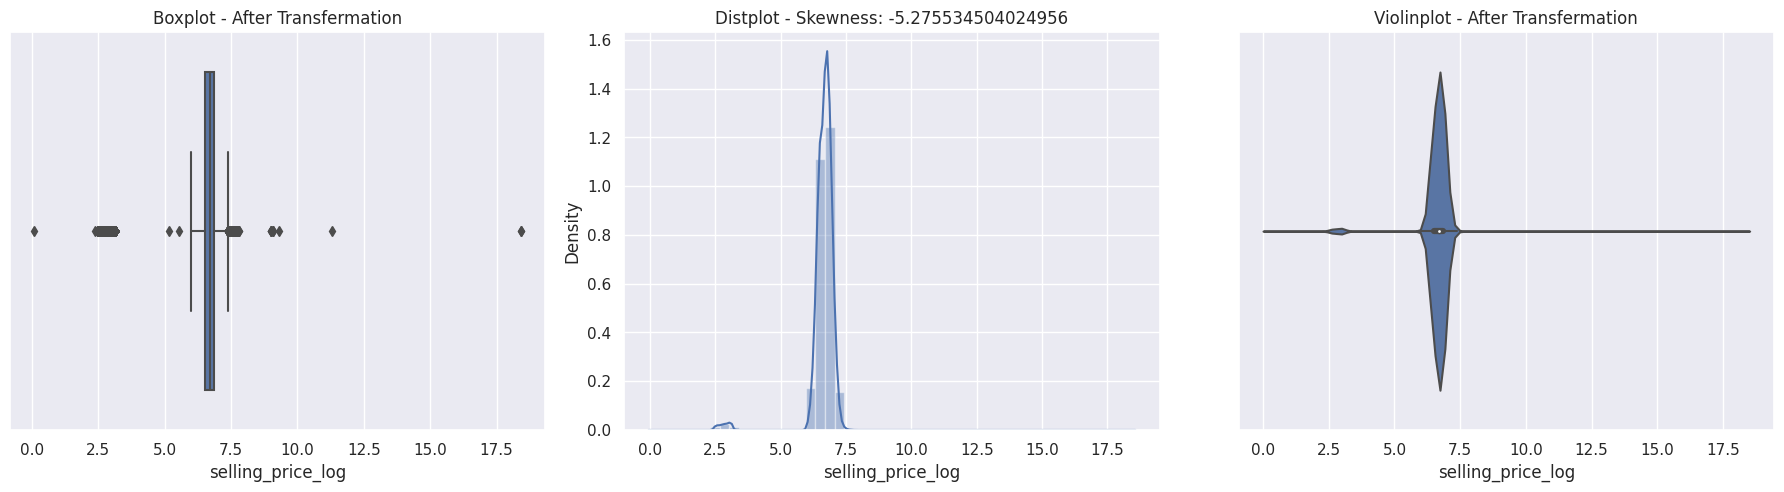

In [ ]:
Log_Transformation(df1, *numerical_columns)

<Axes: >

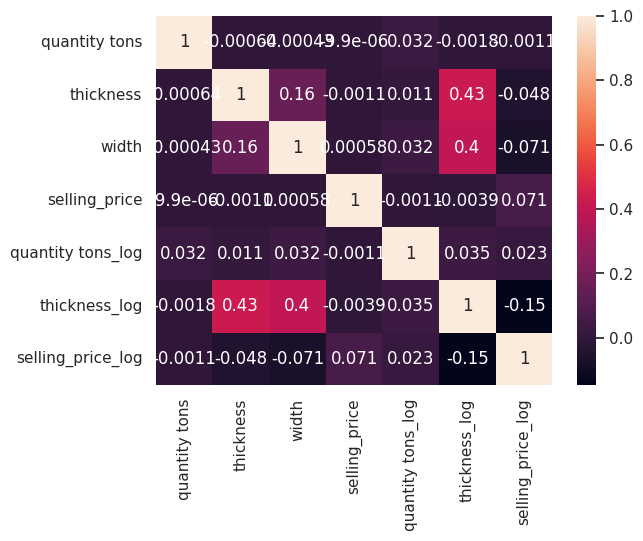

In [ ]:
column_name = ['quantity tons', 'thickness', 'width', 'selling_price', 'quantity tons_log', 'thickness_log', 'selling_price_log']
sns.heatmap(df1[column_name].corr(), annot= True)

# **Outliers Handling - Interquartile Range (IQR) method**

In [ ]:
def outlier_plot(df):

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='width', data=df)
    plt.title('Boxplot - width')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='quantity tons_log', data=df)
    plt.title('Boxplot - quantity tons_log')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='thickness_log', data=df)
    plt.title('Boxplot - '+ 'thickness_log')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='selling_price_log', data=df)
    plt.title('Boxplot - '+ 'selling_price_log')
    plt.tight_layout()

    return plt.show()

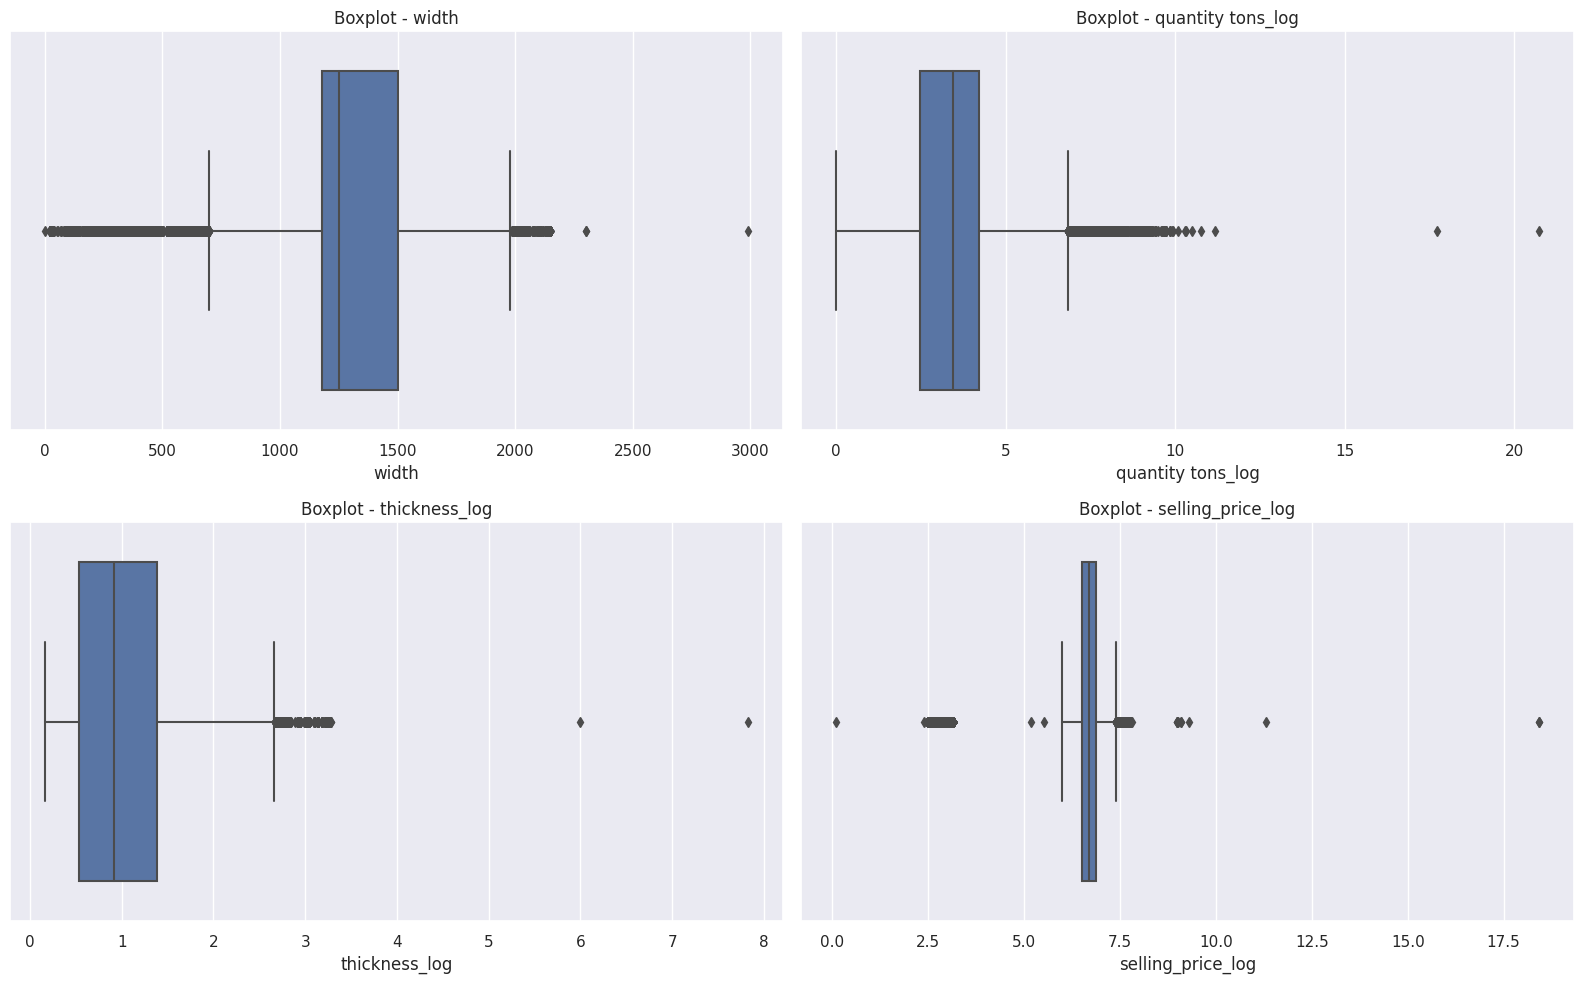

In [ ]:
outlier_plot(df1)

In [ ]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,width_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,4.010077,7.313887,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,7.099202,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,6.859615,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,7.183871,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.667626,7.601402,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.639402,7.107425,0.672944,6.383507
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.342748,7.313887,0.667829,6.380123
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.655480,7.131699,0.536493,6.429719
181671,2020-07-02,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,3.445693,7.131699,0.615186,6.400257


In [ ]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df1, 'quantity tons_log')
outlier(df1, 'thickness_log')
outlier(df1, 'selling_price_log')
outlier(df1, 'width')

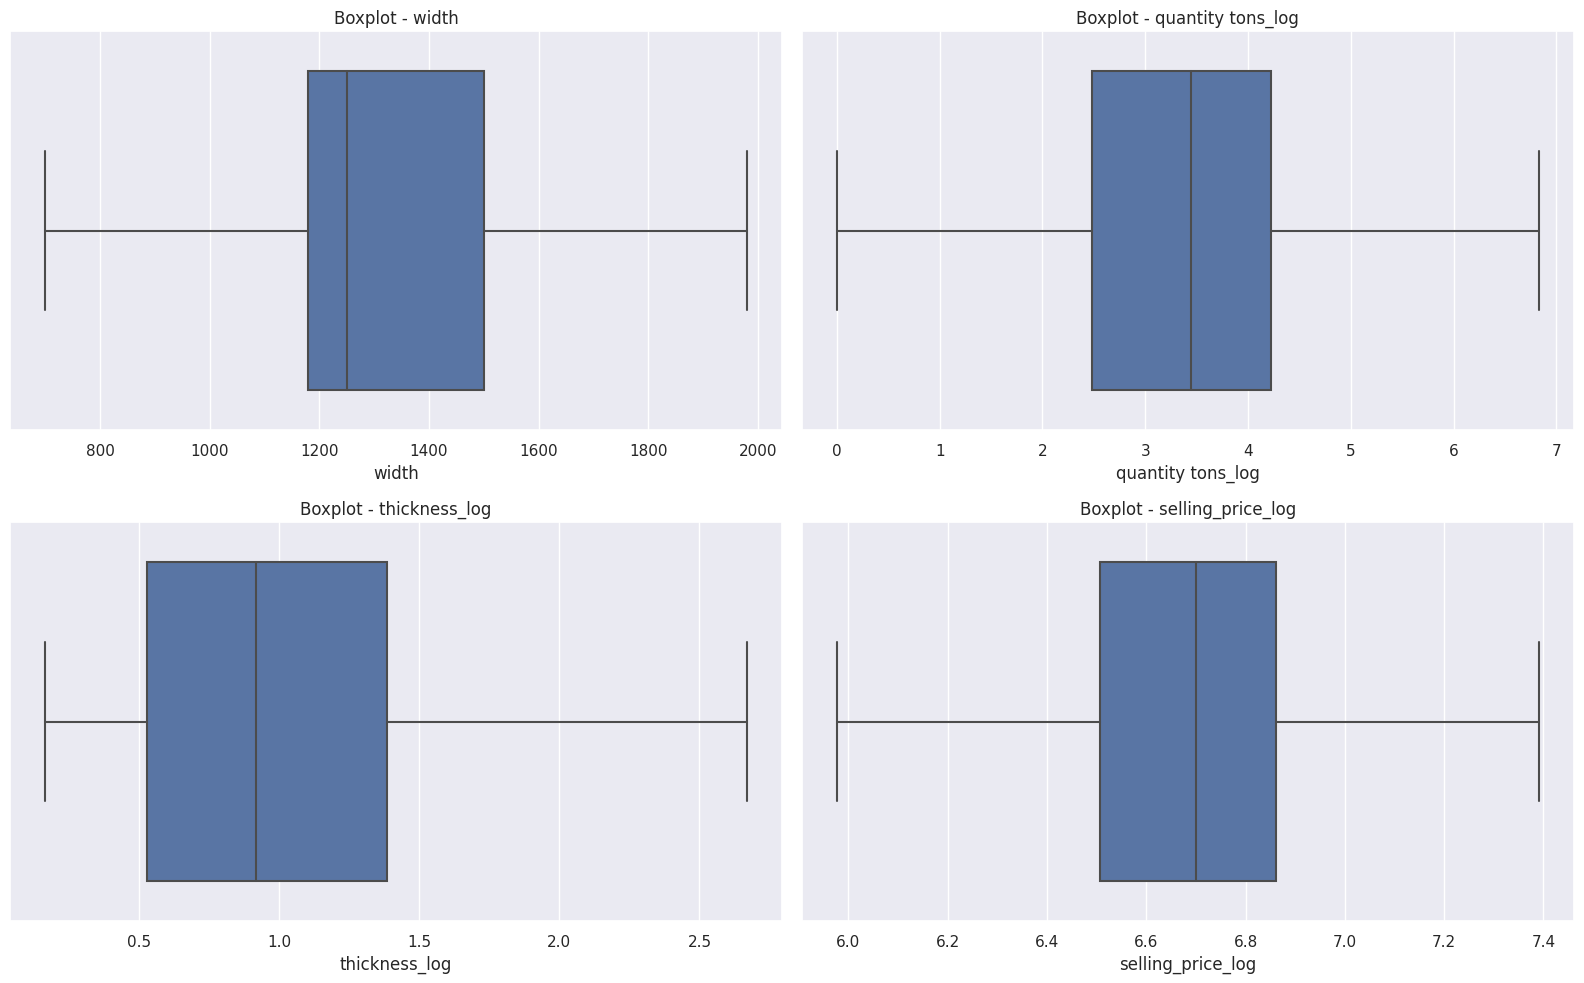

In [ ]:
outlier_plot(df1)

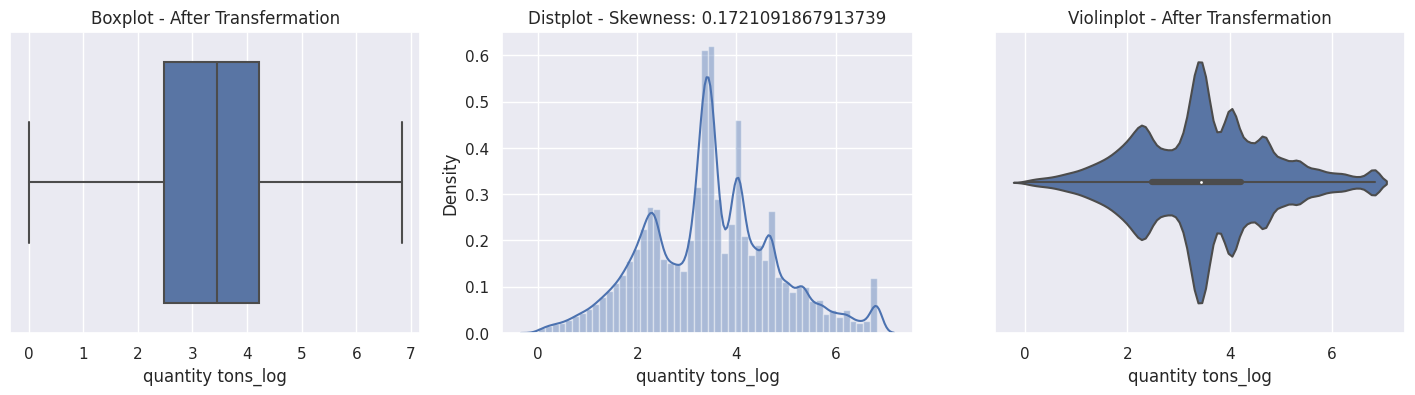

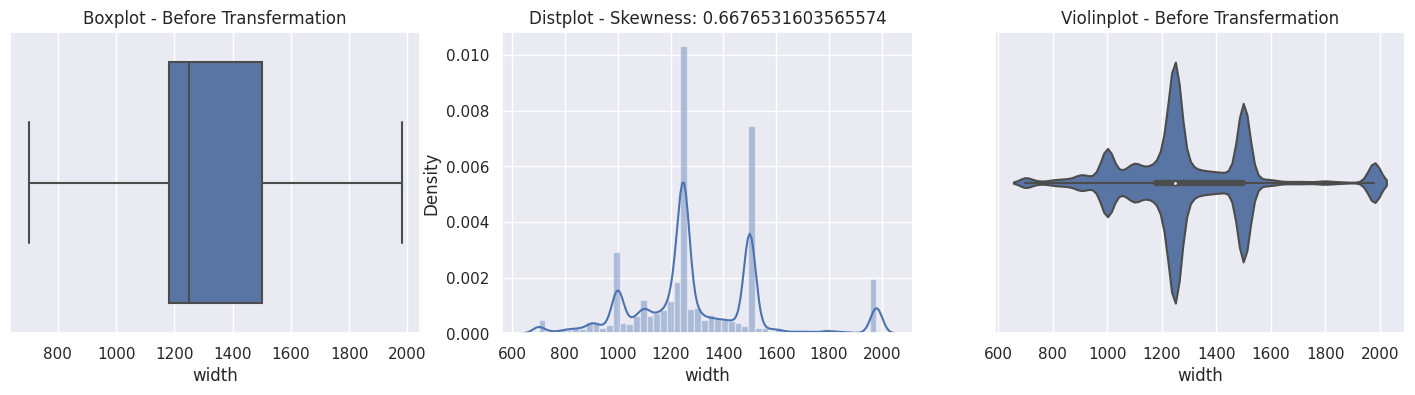

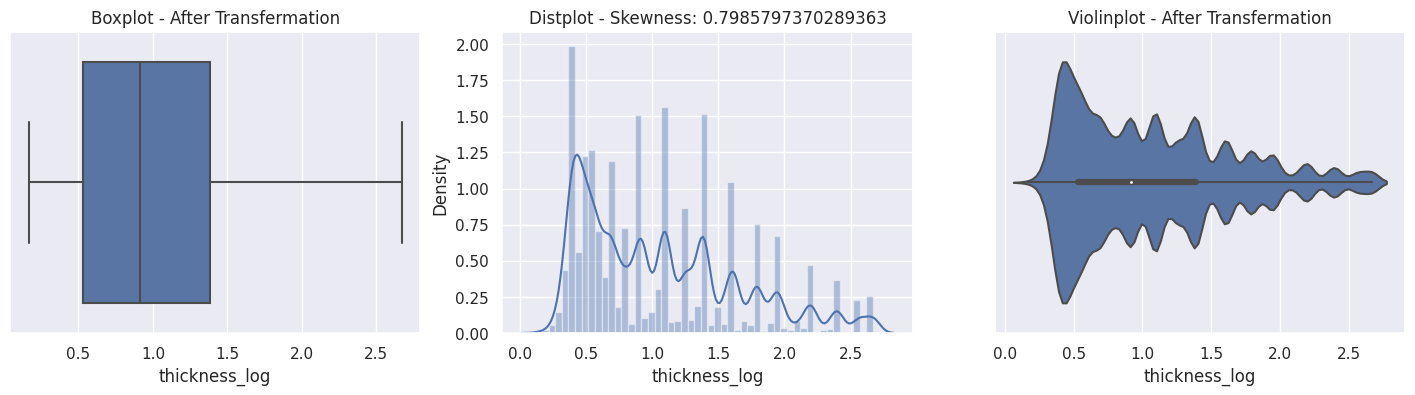

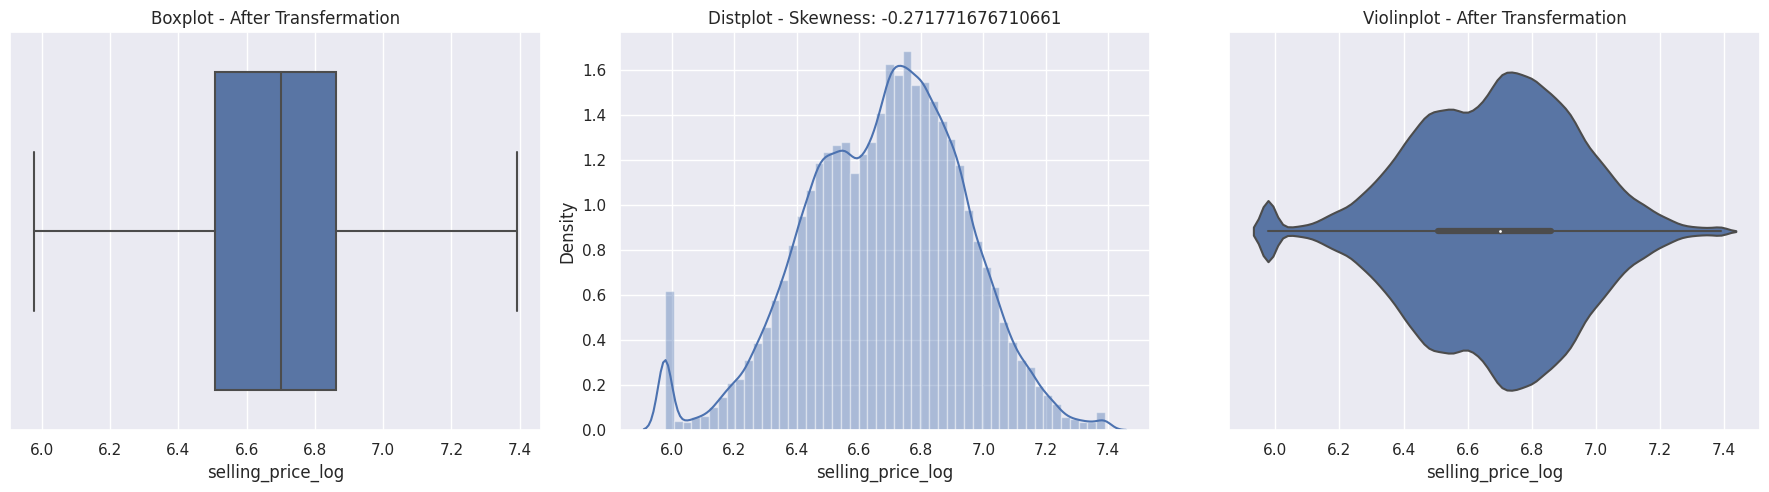

In [ ]:
outlier_handle_col=['quantity tons_log','width', 'thickness_log','selling_price_log']
skewness_plot(df1, *outlier_handle_col)

<Axes: >

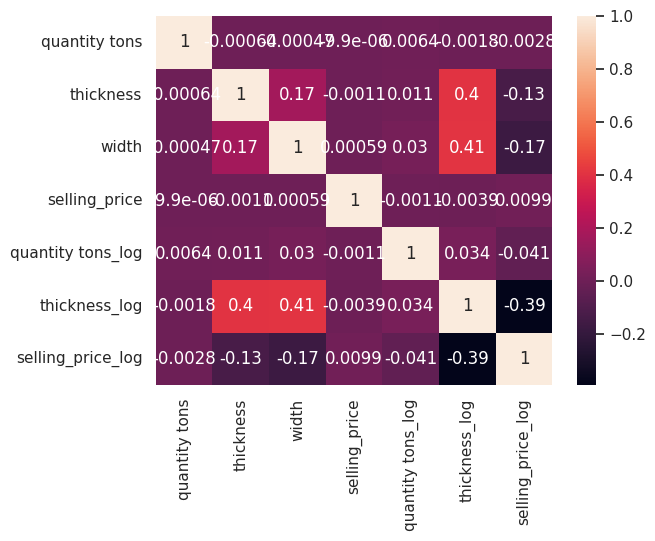

In [ ]:
column_name = ['quantity tons', 'thickness', 'width', 'selling_price', 'quantity tons_log', 'thickness_log', 'selling_price_log']
sns.heatmap(df1[column_name].corr(), annot= True)

In [ ]:
df1.drop(columns=['width_log'], inplace=True)
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,4.010077,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.639402,0.672944,6.383507
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.342748,0.667829,6.380123
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.655480,0.536493,6.429719
181671,2020-07-02,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,3.445693,0.615186,6.400257


In [ ]:
df1.dtypes

item_date             object
quantity tons        float64
customer             float64
country              float64
status                object
item type             object
application          float64
thickness            float64
width                float64
product_ref            int64
delivery date         object
selling_price        float64
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [ ]:
df2=df1.copy()
# find the difference between item and delivery date and add the new column of dataframe
df2['day_difference'] = (pd.to_datetime(df2['delivery date']) - pd.to_datetime(df2['item_date'])).dt.days

In [ ]:
df2['item_date'] = pd.to_datetime(df2['item_date'], format = '%Y/%m/%d')
df2['delivery date'] = pd.to_datetime(df2['delivery date'], format = '%Y/%m/%d')

df2['item_date_day'] = df2['item_date'].dt.day
df2['item_date_month'] = df2['item_date'].dt.month
df2['item_date_year'] = df2['item_date'].dt.year
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,4.010077,1.098612,6.751101,91,1,4,2021
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,0.587787,6.954639,0,1,4,2021
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,0.322083,6.469762,-90,1,4,2021
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,1.193922,6.645091,-90,1,4,2021
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.667626,1.609438,6.359574,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.639402,0.672944,6.383507,-1,2,7,2020
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.342748,0.667829,6.380123,-1,2,7,2020
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.655480,0.536493,6.429719,-1,2,7,2020
181671,2020-07-02,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,3.445693,0.615186,6.400257,-1,2,7,2020


In [ ]:
# split the non-negative value of 'Date_difference' column in separate dataframe
non_negative_delivery_date_df = df2[df2['day_difference'] > 0]

# split the negative value of 'Date_difference' column in another dataframe
negative_delivery_date_df = df2[df2['day_difference'] <= 0]

non_negative_delivery_date_df.shape, negative_delivery_date_df.shape

((165105, 19), (16568, 19))

In [ ]:
#take a copy
correct_delivery_date = non_negative_delivery_date_df.copy()
inconsitance_delivery_date = negative_delivery_date_df.copy()

In [ ]:
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor,
                              HistGradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:

class Regression:

    def __init__(self, x, y):
        self.models = {
            'AdaBoostRegressor': AdaBoostRegressor(),
            'RandomForestRegressor': RandomForestRegressor(),
            'ExtraTreesRegressor': ExtraTreesRegressor(),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
            'DecisionTreeRegressor': DecisionTreeRegressor(),
            'XGBRegressor': XGBRegressor()
        }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def evaluate_model(self, model_name, model):
        y_train_pred = model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred = model.predict(self.x_test)

        result = {
            'Model_Name': model_name,
            'Train_Mean_Square_Error': f'{mean_squared_error(self.y_train, y_train_pred):.4e}',
            'Test_Mean_Square_Error': f'{mean_squared_error(self.y_test, y_test_pred):.4e}',
            'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred), 4),
            'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred), 4),
            'Train_R2_Score': f'{r2_score(self.y_train, y_train_pred):.4e}',
            'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4),
        }

        return result

    def all_models(self):
        # Train and evaluate each model
        results = [self.evaluate_model(model_name, model) for model_name, model in self.models.items()]

        self.model_score_df = pd.DataFrame(results)

        return self.model_score_df


In [ ]:
#categorical to numerical conversion
enc=OrdinalEncoder()
for col in ['delivery date', 'item_date', 'status', 'item type']:
    correct_delivery_date[col] = enc.fit_transform(correct_delivery_date[[col]])
    inconsitance_delivery_date[col] = enc.fit_transform(inconsitance_delivery_date[[col]])

In [ ]:
# split to asign the indipentend and dipentend features in correct_delivery_date
y = correct_delivery_date['day_difference']
x = correct_delivery_date.drop(['day_difference', 'item_date', 'delivery date'], axis =1)

In [ ]:
# Train models using the 'regression_methode'
models = Regression(x, y)
results_df = models.all_models()
results_df

,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,1.4575e+03,1.4509e+03,32.4440,32.2969,5.0972e-02,0.0516
1,RandomForestRegressor,1.2561e+01,8.9018e+01,1.3576,3.6198,9.9182e-01,0.9418
2,ExtraTreesRegressor,0.0000e+00,6.7433e+01,0.0000,2.8318,1.0000e+00,0.9559
3,GradientBoostingRegressor,6.8838e+02,6.9878e+02,20.5329,20.5979,5.5178e-01,0.5432
4,HistGradientBoostingRegressor,4.1030e+02,4.2697e+02,15.0153,15.2396,7.3285e-01,0.7209
5,DecisionTreeRegressor,0.0000e+00,1.6743e+02,0.0000,3.2470,1.0000e+00,0.8906
6,XGBRegressor,2.3879e+02,2.7050e+02,10.7251,11.3160,8.4452e-01,0.8232


In [ ]:

def train_and_evaluate(x, y, inconsistent_data):
    # Split the original dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(x_train, y_train)

    # Predictions on training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate mean square errors
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Train_Mean_Square_Error: {round(mse_train, 4)}')
    print(f'Test_Mean_Square_Error: {round(mse_test, 4)}')

    # Extract features for inconsistent delivery date data
    y_new = inconsistent_data['day_difference']
    x_new = inconsistent_data.drop(['day_difference', 'item_date', 'delivery date'], axis=1)

    # Predict day_difference for inconsistent delivery dates
    day_pred = model.predict(x_new)

    return day_pred


In [ ]:
day_pred=train_and_evaluate(x, y, inconsitance_delivery_date)

Train_Mean_Square_Error: 12.351
Test_Mean_Square_Error: 88.0852


In [ ]:
# Update 'day_difference' in the original DataFrame

negative_delivery_date_df['day_difference'] = day_pred

In [ ]:
negative_delivery_date_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,0.587787,6.954639,104.80,1,4,2021
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,0.322083,6.469762,75.45,1,4,2021
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,1.193922,6.645091,63.17,1,4,2021
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.667626,1.609438,6.359574,90.67,1,4,2021
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-04-01,983.00,5.424027,0.916291,6.891626,105.61,1,4,2021


In [ ]:
# Update  'delivery_date' with the help of 'day_difference' in the original DataFrame

negative_delivery_date_df['delivery date'] = negative_delivery_date_df.apply(
    lambda row: row['item_date'] + pd.to_timedelta(row['day_difference'], unit='D'),
    axis=1
)

negative_delivery_date_df.head()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-07-14 19:12:00,1047.00,6.645123,0.587787,6.954639,104.80,1,4,2021
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-06-15 10:48:00,644.33,5.958755,0.322083,6.469762,75.45,1,4,2021
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-06-03 04:04:48,768.00,5.315229,1.193922,6.645091,63.17,1,4,2021
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-06-30 16:04:48,577.00,6.667626,1.609438,6.359574,90.67,1,4,2021
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-07-15 14:38:24,983.00,5.424027,0.916291,6.891626,105.61,1,4,2021


In [ ]:
#take copy safty perpose
sample=negative_delivery_date_df.copy()

In [ ]:

negative_delivery_date_df['item_date'] = pd.to_datetime(negative_delivery_date_df['item_date'])

# Update 'delivery date' using apply and a lambda function
negative_delivery_date_df['delivery date'] = negative_delivery_date_df.apply(
    lambda row: (row['item_date'] + pd.to_timedelta(row['day_difference'], unit='D')).strftime("%Y-%m-%d"),
    axis=1
)
negative_delivery_date_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-07-14,1047.00,6.645123,0.587787,6.954639,104.80,1,4,2021
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-06-15,644.33,5.958755,0.322083,6.469762,75.45,1,4,2021
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-06-03,768.00,5.315229,1.193922,6.645091,63.17,1,4,2021
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-06-30,577.00,6.667626,1.609438,6.359574,90.67,1,4,2021
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-07-15,983.00,5.424027,0.916291,6.891626,105.61,1,4,2021


In [ ]:
final_copper_data = pd.concat([non_negative_delivery_date_df, negative_delivery_date_df],  axis=0, ignore_index=True)

# Extract day, month, and year components from 'delivery date'

final_copper_data['delivery date'] = pd.to_datetime(final_copper_data['delivery date'])
final_copper_data['delivery_date_day'] = final_copper_data['delivery date'].dt.day
final_copper_data['delivery_date_month'] = final_copper_data['delivery date'].dt.month
final_copper_data['delivery_date_year'] = final_copper_data['delivery date'].dt.year
final_copper_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,...,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,...,4.010077,1.098612,6.751101,91.0,1,4,2021,1,7,2021
1,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,...,1.509090,0.322083,5.977199,91.0,1,4,2021,1,7,2021
2,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,...,4.249521,0.470004,7.218177,91.0,1,4,2021,1,7,2021
3,2021-04-01,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,...,2.320009,0.322083,5.977199,91.0,1,4,2021,1,7,2021
4,2021-04-01,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,...,3.350344,0.559616,7.002156,91.0,1,4,2021,1,7,2021


In [ ]:
# Drop 'item_date' and 'delivery date' columns
final_copper_data.drop(['item_date', 'delivery date'], axis =1, inplace = True )
final_copper_data

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.0,4.010077,1.098612,6.751101,91.00,1,4,2021,1,7,2021
1,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,18.0,1.509090,0.322083,5.977199,91.00,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.0,4.249521,0.470004,7.218177,91.00,1,4,2021,1,7,2021
3,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,17.0,2.320009,0.322083,5.977199,91.00,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,1098.0,3.350344,0.559616,7.002156,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.0,4.639402,0.672944,6.383507,42.56,2,7,2020,13,8,2020
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.0,5.342748,0.667829,6.380123,41.18,2,7,2020,12,8,2020
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.0,1.655480,0.536493,6.429719,38.08,2,7,2020,9,8,2020
181671,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.0,3.445693,0.615186,6.400257,40.78,2,7,2020,11,8,2020


# **Classification Method - Predict Status**

In [ ]:
df=pd.read_csv("/content/final_copper_data.csv")
final_copper_data=pd.DataFrame(df)
final_copper_data

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.0,4.010077,1.098612,6.751101,91.00,1,4,2021,1,7,2021
1,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,18.0,1.509090,0.322083,5.977199,91.00,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.0,4.249521,0.470004,7.218177,91.00,1,4,2021,1,7,2021
3,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,17.0,2.320009,0.322083,5.977199,91.00,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,1098.0,3.350344,0.559616,7.002156,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.0,4.639402,0.672944,6.383507,42.56,2,7,2020,13,8,2020
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.0,5.342748,0.667829,6.380123,41.18,2,7,2020,12,8,2020
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.0,1.655480,0.536493,6.429719,38.08,2,7,2020,9,8,2020
181671,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.0,3.445693,0.615186,6.400257,40.78,2,7,2020,11,8,2020


In [ ]:
# Filter rows where 'status' is either 'Won' or 'Lost'

final_data= final_copper_data[(final_copper_data['status'] == 'Won') | (final_copper_data['status'] == 'Lost')]
final_data

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,4.010077,1.098612,6.751101,91.00,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.00,4.249521,0.470004,7.218177,91.00,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,1098.00,3.350344,0.559616,7.002156,91.00,1,4,2021,1,7,2021
5,32.235317,30202362.0,27.0,Won,S,10.0,0.60,1010.0,628377,973.00,3.503613,0.470004,6.881411,91.00,1,4,2021,1,7,2021
7,20.807114,30211222.0,30.0,Won,W,10.0,0.45,900.0,611993,1315.19,3.082236,0.371564,7.182496,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,4.639402,0.672944,6.383507,42.56,2,7,2020,13,8,2020
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,5.342748,0.667829,6.380123,41.18,2,7,2020,12,8,2020
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.655480,0.536493,6.429719,38.08,2,7,2020,9,8,2020
181671,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,3.445693,0.615186,6.400257,40.78,2,7,2020,11,8,2020


In [ ]:
print(final_data['status'].unique())
print(final_data['item type'].unique())

['Won' 'Lost']
['W' 'S' 'Others' 'PL' 'WI' 'IPL' 'SLAWR']


In [ ]:
final_data.status.value_counts()

Won     116012
Lost     34438
Name: status, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
columns_to_encode = ['status', 'item type']

for col_name in columns_to_encode:
    encoder = OrdinalEncoder()
    final_data[col_name] = encoder.fit_transform(final_data[[col_name]])


In [ ]:
print(final_data['status'].unique())
print(final_data['item type'].unique())

[1. 0.]
[5. 3. 1. 2. 6. 0. 4.]


In [ ]:
# item type = {'W': 5.0, 'S': 3.0, 'Others': 1.0, 'PL': 2.0, 'WI': 6.0, 'IPL': 0.0, 'SLAWR': 4.0}
# status = {'Won': 1.0, 'Lost': 0.0}

In [ ]:
final_data

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.0,1670798778,854.00,4.010077,1.098612,6.751101,91.00,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,1.0,3.0,10.0,0.60,1275.0,1668701376,1363.00,4.249521,0.470004,7.218177,91.00,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,1.0,5.0,10.0,0.75,1250.0,164141591,1098.00,3.350344,0.559616,7.002156,91.00,1,4,2021,1,7,2021
5,32.235317,30202362.0,27.0,1.0,3.0,10.0,0.60,1010.0,628377,973.00,3.503613,0.470004,6.881411,91.00,1,4,2021,1,7,2021
7,20.807114,30211222.0,30.0,1.0,5.0,10.0,0.45,900.0,611993,1315.19,3.082236,0.371564,7.182496,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,1.0,5.0,41.0,0.96,1220.0,164141591,591.00,4.639402,0.672944,6.383507,42.56,2,7,2020,13,8,2020
181669,208.086469,30200854.0,25.0,1.0,5.0,41.0,0.95,1500.0,164141591,589.00,5.342748,0.667829,6.380123,41.18,2,7,2020,12,8,2020
181670,4.235594,30200854.0,25.0,1.0,5.0,41.0,0.71,1250.0,164141591,619.00,1.655480,0.536493,6.429719,38.08,2,7,2020,9,8,2020
181671,30.365013,30200854.0,25.0,1.0,5.0,41.0,0.85,1250.0,164141591,601.00,3.445693,0.615186,6.400257,40.78,2,7,2020,11,8,2020


In [ ]:
import pandas as pd

# Check the distribution of the target variable
class_distribution = final_data['status'].value_counts()

# Print the distribution
print("Class Distribution:")
print(class_distribution)

# Check if the classes are balanced or imbalanced
if len(class_distribution) == 2:
    minority_class, majority_class = class_distribution.index
    minority_samples = class_distribution[minority_class]
    majority_samples = class_distribution[majority_class]

    imbalance_ratio = majority_samples / minority_samples
    print("\nImbalance Ratio:", imbalance_ratio)

    if imbalance_ratio > 1.5:  # Adjust this threshold based on your problem
        print("The classes are imbalanced.")
    else:
        print("The classes are balanced.")
else:
    print("Not a binary classification problem.")


Class Distribution:
1.0    116012
0.0     34438
Name: status, dtype: int64

Imbalance Ratio: 0.2968486018687722
The classes are balanced.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150450 entries, 0 to 181672
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   quantity tons        150450 non-null  float64
 1   customer             150450 non-null  float64
 2   country              150450 non-null  float64
 3   status               150450 non-null  float64
 4   item type            150450 non-null  float64
 5   application          150450 non-null  float64
 6   thickness            150450 non-null  float64
 7   width                150450 non-null  float64
 8   product_ref          150450 non-null  int64  
 9   selling_price        150450 non-null  float64
 10  quantity tons_log    150450 non-null  float64
 11  thickness_log        150450 non-null  float64
 12  selling_price_log    150450 non-null  float64
 13  day_difference       150450 non-null  float64
 14  item_date_day        150450 non-null  int64  
 15  item_date_month  

In [ ]:
# Define target variable 'y_new' and features 'x_new'
y_new= final_data['status']
x_new = final_data.drop('status', axis =1)

In [ ]:

def machine_learning_classification(x_new, y_new, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    return {
        'algorithm': algorithm.__name__,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test
    }

classifiers = [
    DecisionTreeClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    XGBClassifier
]

results = []

for classifier in classifiers:
    accuracy_metrics = machine_learning_classification(x_new, y_new, classifier)
    results.append(accuracy_metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,algorithm,accuracy_train,accuracy_test
0,DecisionTreeClassifier,1.000000,0.955733
1,ExtraTreesClassifier,1.000000,0.971186
2,RandomForestClassifier,0.999992,0.969159
3,AdaBoostClassifier,0.823214,0.821070
4,GradientBoostingClassifier,0.846311,0.846693
5,XGBClassifier,0.949975,0.937089


In [ ]:
#Checking the  accuracy_train b/w accuracy_test diferance
results_df['accuracy_train']-results_df['accuracy_test']

0    0.044267
1    0.028814
2    0.030833
3    0.002144
4   -0.000382
5    0.012886
dtype: float64

In [ ]:
#I am choosing ExtraTreesClassifier High accuracy on both the training set (1.0) and the test set (0.971)
# Fit an ExtraTreesClassifier model to the training set
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

model = ExtraTreesClassifier().fit(x_train, y_train)
y_pred= model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9706879361914257

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120360, 19), (30090, 19), (120360,), (30090,))

In [ ]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=et_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions using the best model
y_pred = best_estimator.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.971053506148222


In [ ]:
# Create an ExtraTreesClassifier model with specific hyperparameters
clacifier_model = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1,bootstrap=False)
clacifier_model.fit(x_train, y_train)
y_pred= clacifier_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print("===========================================================================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print("===========================================================================")
print(classification_report(y_true=y_test, y_pred=y_pred))

0.9710867397806581
[[ 6407   460]
 [  410 22813]]
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      6867
         1.0       0.98      0.98      0.98     23223

    accuracy                           0.97     30090
   macro avg       0.96      0.96      0.96     30090
weighted avg       0.97      0.97      0.97     30090



In [ ]:
y_test.value_counts()

1.0    23223
0.0     6867
Name: status, dtype: int64

In [ ]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

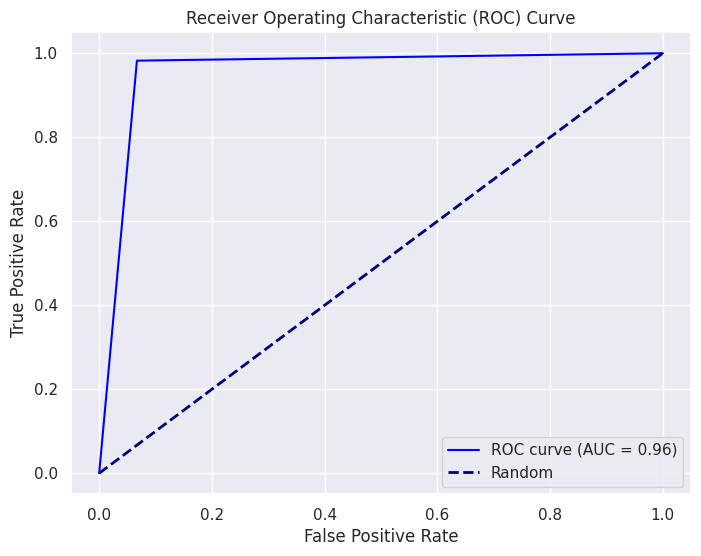

In [ ]:
import matplotlib.pyplot as plt
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=1.5, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#create the pickle file of model
import pickle

with open('classification_model_Predict_Status.pkl', 'wb') as file:
    pickle.dump(clacifier_model, file)

In [ ]:
with open('/content/classification_model_Predict_Status.pkl', 'rb' ) as file:
    clacifier_model1 = pickle.load(file)

In [ ]:
# will pass the user data manually to check the prediction of status ar our model

user_data1 = np.array([[32.235317,	30202362.0,	27.0,	3.0,	10.0,	0.60,	1010.0,	628377,	973.00,	3.503613,	0.470004,	6.881411,	91.00,	1,	4,	2021,	1,	7,	2021]])
y_p =clacifier_model1.predict(user_data1)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')


Won


In [ ]:
# will pass the user data manually to check the prediction of status ar our model

user_data2 = np.array([[11.454558,	30223403.0,	78.0,	5.0,	10.0,	4.0,	1500.0,	1668701718,	1186.0,	2.522087,	1.609438,	7.079184,	91.00,	1,	4,	2021,	1,	7,	2021]])
y_p = clacifier_model1.predict(user_data2)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


# **Regression Method - Prdict Selling Price**

In [ ]:
df=pd.read_csv("/content/final_copper_data.csv")
final_copper_data1=pd.DataFrame(df)
final_copper_data1

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,quantity tons_log,thickness_log,selling_price_log,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.0,4.010077,1.098612,6.751101,91.00,1,4,2021,1,7,2021
1,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,18.0,1.509090,0.322083,5.977199,91.00,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.0,4.249521,0.470004,7.218177,91.00,1,4,2021,1,7,2021
3,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,17.0,2.320009,0.322083,5.977199,91.00,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,1098.0,3.350344,0.559616,7.002156,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.0,4.639402,0.672944,6.383507,42.56,2,7,2020,13,8,2020
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.0,5.342748,0.667829,6.380123,41.18,2,7,2020,12,8,2020
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.0,1.655480,0.536493,6.429719,38.08,2,7,2020,9,8,2020
181671,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.0,3.445693,0.615186,6.400257,40.78,2,7,2020,11,8,2020


In [ ]:
print(final_copper_data1['status'].unique())
print(final_copper_data1['item type'].unique())

['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'S' 'Others' 'PL' 'WI' 'IPL' 'SLAWR']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
columns_to_encode = ['status', 'item type']

for col_name in columns_to_encode:
    encoder = OrdinalEncoder()
    final_copper_data1[col_name] = encoder.fit_transform(final_copper_data1[[col_name]])
print(final_copper_data1['status'].unique())
print(final_copper_data1['item type'].unique())

[7. 0. 6. 1. 2. 8. 5. 4. 3.]
[5. 3. 1. 2. 6. 0. 4.]


In [ ]:
# status = {'Won': 7.0, 'Draft': 0.0, 'To be approved': 6.0, 'Lost': 1.0, 'Not lost for AM': 2.0, 'Wonderful': 8.0, 'Revised': 5.0, 'Offered': 4.0, 'Offerable': 3.0}
# item_type = {'W': 5.0, 'S': 3.0, 'Others': 1.0, 'PL': 2.0, 'WI': 6.0, 'IPL': 0.0, 'SLAWR': 4.0}

In [ ]:
#assign to x-indepentend variable and y-dipentent variable
y = final_copper_data1['selling_price_log']
x = final_copper_data1.drop(['selling_price_log', 'selling_price'], axis =1)

In [ ]:
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor,
                              HistGradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:

class Regression:

    def __init__(self, x, y):
        self.models = {
            'AdaBoostRegressor': AdaBoostRegressor(),
            'RandomForestRegressor': RandomForestRegressor(),
            'ExtraTreesRegressor': ExtraTreesRegressor(),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
            'DecisionTreeRegressor': DecisionTreeRegressor(),
            'XGBRegressor': XGBRegressor()
        }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def evaluate_model(self, model_name, model):
        y_train_pred = model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred = model.predict(self.x_test)

        result = {
            'Model_Name': model_name,
            'Train_Mean_Square_Error': f'{mean_squared_error(self.y_train, y_train_pred):.4e}',
            'Test_Mean_Square_Error': f'{mean_squared_error(self.y_test, y_test_pred):.4e}',
            'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred), 4),
            'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred), 4),
            'Train_R2_Score': f'{r2_score(self.y_train, y_train_pred):.4e}',
            'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4),
        }

        return result

    def all_models(self):
        # Train and evaluate each model
        results = [self.evaluate_model(model_name, model) for model_name, model in self.models.items()]

        self.model_score_df = pd.DataFrame(results)

        return self.model_score_df


In [ ]:
# Train models using the 'regression_methode'
models = Regression(x, y)
results = models.all_models()
results

,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,1.7448e-02,1.7550e-02,0.1038,0.1041,7.3188e-01,0.7299
1,RandomForestRegressor,3.2787e-04,2.3487e-03,0.0110,0.0295,9.9496e-01,0.9638
2,ExtraTreesRegressor,8.9223e-29,2.6673e-03,0.0000,0.0309,1.0000e+00,0.9589
3,GradientBoostingRegressor,6.8807e-03,6.9790e-03,0.0610,0.0616,8.9426e-01,0.8926
4,HistGradientBoostingRegressor,4.2799e-03,4.4138e-03,0.0466,0.0473,9.3423e-01,0.9321
5,DecisionTreeRegressor,1.2301e-28,4.0469e-03,0.0000,0.0356,1.0000e+00,0.9377
6,XGBRegressor,2.9517e-03,3.3249e-03,0.0380,0.0399,9.5464e-01,0.9488


In [ ]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy
#i will choosing RandomForestRegressor	becouse accuracy is good
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Regression_model = RandomForestRegressor().fit(x_train, y_train)

# Predict the target variable on the testing set and training set
y_test_pred= Regression_model.predict(x_test)
y_train_pred = Regression_model.predict(x_train)

data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4),
        'Test_R2_Score': round(r2_score(y_test, y_test_pred), 4),}
print(data)

{'Train_Mean_Square_Error': 0.0003, 'Test_Mean_Square_Error': 0.0023, 'Test_R2_Score': 0.9639}


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((145338, 18), (36335, 18), (145338,), (36335,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 197}


In [56]:
# Initialize an RandomForestRegressor model with specified hyperparameters

Regression_model_Prdict_Price = RandomForestRegressor(n_estimators = 197, max_depth = 30 , max_features = 'sqrt', min_samples_leaf = 2,
                                min_samples_split = 5, bootstrap = False)
Regression_model_Prdict_Price.fit(x_train, y_train)
y_pred = Regression_model_Prdict_Price.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.9634000952803157, 'Mean Absolute Error': 0.03102773497442767, 'Mean Squared Error': 0.0023778333953105727, 'Root Mean Squared Error': 0.04876303308153188}


In [68]:
data = np.array([[69.071853,	30341428.0,	38.0,	7.0,	3.0,	10.0,	0.60,	1275.0,	1668701376,	4.249521,	0.470004,	91.00,	1,	4,	2021,	1,	7	,2021]])
#data =data.reshape(1, -1)
p_result=Regression_model_Prdict_Price .predict(data)
p_result

array([7.16560601])

In [69]:
np.exp(p_result)

array([1294.14563465])

In [70]:
# save the regression model by using pickle
import pickle
with open('Regression_model_Prdict_Price.pkl', 'wb') as file:
    pickle.dump(Regression_model_Prdict_Price, file)

In [71]:
# # load the pickle model to predict selling price
with open('/content/Regression_model_Prdict_Price.pkl', 'rb' ) as file:
    model= pickle.load(file)

In [72]:
np.exp(model.predict(data))

array([1294.14563465])

In [75]:
data1 = np.array([[30.365013,	30200854,	25,	7,	5,	41,	0.85,	1250,	164141591,	3.445693,	0.615186,	40.78,	2,	7,	2020,	11,	8,	2020]])
p_result=Regression_model_Prdict_Price .predict(data1)
p_result

array([6.40059889])

In [76]:
np.exp(model.predict(data1))

array([602.20558651])